In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import matplotlib

In [5]:
from matplotlib import font_manager, rc

In [6]:
import platform

In [ ]:
from pandas import Series, DataFrame

In [ ]:
from spicy import stat

In [7]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [8]:
%matplotlib inline

In [145]:
small = pd.read_csv('smalldata2.csv')

In [146]:
small['time'] = pd.to_datetime(small['time']).dt.strftime('%H:%M:%S') 
# 24시간제로 변경

In [ ]:
small['sex2'] = small['sex'].apply(lambda x: '비었음' if x == "비었음" else "앉음")

In [147]:
small.head()

,date,time,name,line,start,stop,crowded,old_age_seat,sex,empty_station,age,badge,pregnant,heavy,behavior,characteristic,bag
0,2019-07-31,19:10:00,재민,5호선,공덕,여의도,N,NaN,여,NaN,중년,X,X,X,"이어폰, 핸드폰",NaN,"쇼핑백, 장우산"
1,2019-07-31,19:21:00,재민,9호선,여의도,신논현,F,NaN,여,NaN,중년,X,X,X,핸드폰,임산부석 비워달라는 방송이 나왔으나 아랑곳하지 않음,NaN
2,2019-07-31,19:28:00,재민,9호선,여의도,신논현,F,NaN,여,NaN,청년,X,X,X,핸드폰,NaN,NaN
3,2019-07-31,19:32:00,재민,9호선,여의도,신논현,F,NaN,여,NaN,청년,X,O,X,핸드폰,NaN,NaN
4,2019-07-31,22:38:00,재민,분당선,선정릉,야탑,F,NaN,여,NaN,청년,O,O,X,"핸드폰, 대화",NaN,NaN


In [ ]:
-------------------------------------------------------------------------

In [148]:
df_age = pd.DataFrame(small.groupby(small['age'])['age'].count())
# 나이대별 count

In [149]:
df_age.columns  = ['count']

In [150]:
df_age2 = df_age.reset_index()

In [151]:
df_age2

,age,count
0,노년,100
1,어린이,11
2,중년,231
3,청년,227
4,청소년,6


<BarContainer object of 5 artists>

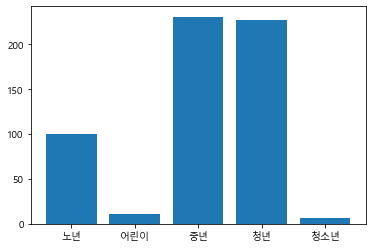

In [152]:
plt.bar(df_age2['age'], df_age2['count'], label = 'age~pregnant_seat')

In [ ]:
-------------------------------------------------------------------------

In [153]:
small.loc[small['sex'] == '비었음','empty_station'].sum() 
# 임산부석이 비었을 때 총 정거장수

1069.0

In [154]:
small.loc[small['age'] == '노년','old_age_seat'].reset_index().groupby('old_age_seat')['old_age_seat'].count()
# 임산부석에 노년이 앉아있을 때 노약자석 빈자리 수

old_age_seat
O    47
X    52
Name: old_age_seat, dtype: int64

In [155]:
oldseat = pd.DataFrame(small.loc[small['age'] == '노년','old_age_seat'].reset_index().groupby('old_age_seat')['old_age_seat'].count())

In [156]:
oldseat.columns = ['count']

In [157]:
df_oldseat = oldseat.reset_index()

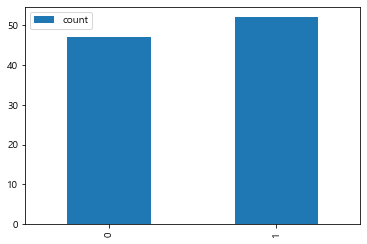

In [158]:
df_oldseat.plot.bar()

In [ ]:
-------------------------------------------------------------------------

In [159]:
count_pg = small.loc[small['sex'] != '비었음','pregnant'].reset_index().groupby('pregnant')['pregnant'].count()
# 임산부석이 채워졌을 때 임산부, 비임산부, 확인불가 수

In [160]:
# df_pregnant = pd.DataFrame(small.groupby(small['pregnant'])['pregnant'].count()) 위와 같음

In [161]:
count_pg.columns = ['count']

In [162]:
count_pg2 = pd.DataFrame(count_pg)

In [163]:
count_pg2.columns = ['count']

In [164]:
count_pg3 = count_pg2.reset_index()

In [165]:
count_pg3

,pregnant,count
0,?,10
1,O,26
2,X,539


<BarContainer object of 3 artists>

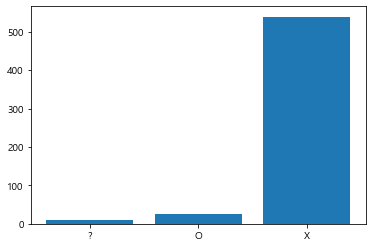

In [166]:
plt.bar(count_pg3['pregnant'], count_pg3['count'])

In [ ]:
-------------------------------------------------------------------------

In [167]:
small.loc[small['sex'] != '비었음','pregnant'].count() 
# 임산부석 앉은 사람 수

575

In [168]:
small.loc[small['pregnant'] == 'O','pregnant'].count() 
# 임산부 수

26

In [169]:
small.loc[small['pregnant'] == 'X','pregnant'].count() 
# 비임산부 수

539

In [170]:
small.loc[(small['age'] != '비었음') & (small['pregnant'] == '?'),'pregnant'].count() 
# 임산부 여부 확인 불가 수

10

In [ ]:
-------------------------------------------------------------------------

In [236]:
df_crowded = pd.DataFrame(small.groupby(['crowded','sex'])['sex'].count())
# 붐비는 정도별 count

In [237]:
df_crowded.columns = ['count']

In [221]:
# df_crowded['sum'] = small.groupby(['crowded']).count()

In [238]:
df_crowded

count
crowded sex       
E       남       19
        비었음    118
        여       54
F       남       54
        비었음     45
        여      212
N       남       55
        비었음     94
        여      182

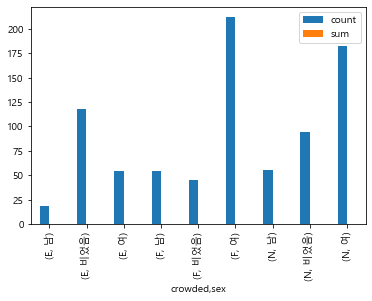

In [213]:
df_crowded.plot.bar()

In [305]:
df_crowded2 = pd.DataFrame(small.groupby(['crowded','sex2'])['sex2'].count())
# 나이대별 count

In [306]:
df_crowded2.columns = ['count']

In [337]:
df_crowded2

count
crowded sex2       
E       비었음     118
        앉음       73
F       비었음      45
        앉음      266
N       비었음      94
        앉음      237

In [ ]:
df_crowded3 = df_crowded2.reset_index()

In [351]:
df_crowded3 = df_crowded3.set_index('crowded')

In [352]:
df_crowded3

,sex2,count
crowded,,
E,비었음,118
E,앉음,73
F,비었음,45
F,앉음,266
N,비었음,94
N,앉음,237


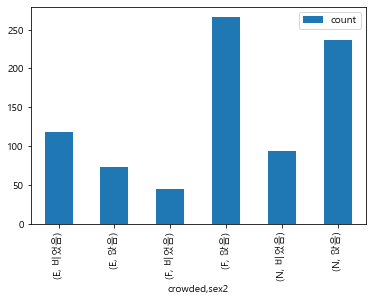

In [288]:
df_crowded2.plot.bar()

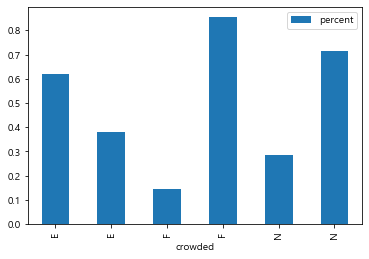

In [383]:
df_crowded5.plot.bar()

In [347]:
c_c = pd.DataFrame(df_crowded2.groupby(['crowded'])['count'].sum())

In [348]:
c_c

,count
crowded,
E,191
F,311
N,331


In [353]:
df_crowded4 = pd.merge(df_crowded3, c_c, on='crowded')

In [354]:
df_crowded4['percent'] = df_crowded4['count_x'] / df_crowded4['count_y']

In [355]:
df_crowded4

,sex2,count_x,count_y,percent
crowded,,,,
E,비었음,118,191,0.617801
E,앉음,73,191,0.382199
F,비었음,45,311,0.144695
F,앉음,266,311,0.855305
N,비었음,94,331,0.283988
N,앉음,237,331,0.716012


In [365]:
df_crowded5 = df_crowded4[[ 'sex2', 'percent']]

In [367]:
df_crowded5.columns = ['empty', 'percent']

In [374]:
df_crowded6 = df_crowded5.reset_index()

In [378]:
df_crowded6 = df_crowded6.set_index(['crowded','empty'])

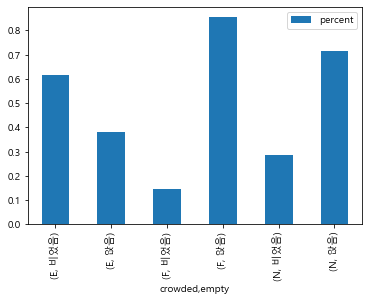

In [379]:
df_crowded6.plot.bar()

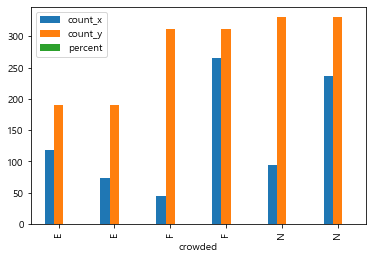

In [127]:
small['date_time'] = pd.to_datetime(small['date'] + ' ' + small['time'])

In [66]:
am = small[(small['time'] >= '07:00') & (small['time'] <= '10:00')]

In [67]:
pm = small[(small['time'] >= '17:30') & (small['time'] <= '21:00')]

ModuleNotFoundError: No module named 'spicy'

In [98]:
sex = small['sex'].tolist()
age = small['age'].tolist()
age_sex = pd.DataFrame({'age': list(age),'sex': list(sex)})
age_sex.columns = ['age', 'sex']

In [112]:
print(sex_age.corr())

Empty DataFrame
Columns: []
Index: []
